# lab-comparing-regression-model

In [1]:
#Importing the necessary libraries if you are starting a new notebook. 
#Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [2]:
categorical_df = customer_df.select_dtypes(['object'])
numerical_df = customer_df.select_dtypes(np.number)

In [3]:
#Checking for NaN values.
customer_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [4]:
#Additional data step: Renaming all the columns to snakecase
cols=[]
for c in categorical_df.columns:
    cols.append(c.lower())
categorical_df.columns=cols
categorical_df.columns = categorical_df.columns.str.replace(' ', '_')
# changing the name of employmentstatus -> employment_status
categorical_df = categorical_df.rename(columns={'employmentstatus':'employment_status'})
# changing the effective date
categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'], 
                                  dayfirst=True).dt.strftime('%d/%m/%Y')
categorical_df.head()

customer       state response  coverage education effective_to_date  \
0  BU79786  Washington       No     Basic  Bachelor        24/02/2011   
1  QZ44356     Arizona       No  Extended  Bachelor        31/01/2011   
2  AI49188      Nevada       No   Premium  Bachelor        19/02/2011   
3  WW63253  California       No     Basic  Bachelor        20/01/2011   
4  HB64268  Washington       No     Basic  Bachelor        02/03/2011   

  employment_status gender location_code marital_status     policy_type  \
0          Employed      F      Suburban        Married  Corporate Auto   
1        Unemployed      F      Suburban         Single   Personal Auto   
2          Employed      F      Suburban        Married   Personal Auto   
3        Unemployed      M      Suburban        Married  Corporate Auto   
4          Employed      M         Rural         Single   Personal Auto   

         policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0  Corporate L3           Offer1         Agent   Two-Door Car      Medsize  
1   Personal L3           Offer3         Agent  Four-Door Car      Medsize  
2   Personal L3           Offer1         Agent   Two-Door Car      Medsize  
3  Corporate L2           Offer1   Call Center            SUV      Medsize  
4   Personal L1           Offer1         Agent  Four-Door Car      Medsize

In [5]:
cols=[]
for c in numerical_df.columns:
    cols.append(c.lower())
numerical_df.columns=cols
numerical_df.columns = numerical_df.columns.str.replace(' ', '_')
numerical_df.head()

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   1          384.811147  
1                          0                   8         1131.464935  
2                          0                   2          566.472247  
3                          0                   7          529.881344  
4                          0                   1          138.130879

In [6]:
#Checking all unique values of columns
for col in categorical_df:
  print(col,categorical_df[col].unique())

customer ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
effective_to_date ['24/02/2011' '31/01/2011' '19/02/2011' '20/01/2011' '02/03/2011'
 '25/01/2011' '18/01/2011' '26/01/2011' '17/02/2011' '21/02/2011'
 '01/06/2011' '02/06/2011' '01/10/2011' '17/01/2011' '01/05/2011'
 '27/02/2011' '14/01/2011' '21/01/2011' '02/05/2011' '29/01/2011'
 '28/02/2011' '02/12/2011' '02/02/2011' '02/07/2011' '22/01/2011'
 '13/02/2011' '15/01/2011' '01/08/2011' '01/11/2011' '28/01/2011'
 '02/08/2011' '23/02/2011' '01/02/2011' '16/02/2011' '27/01/2011'
 '23/01/2011' '01/09/2011' '02/11/2011' '02/04/2011' '02/01/2011'
 '15/02/2011' '26/02/2011' '16/01/2011' '01/01/2011' '02/10/2011'
 '24/01/2011' '25/02/2011' '01/12/2011' '02/09/2011' '19/01/2011'
 '01/04/2011' '14/02/2011' '20/02/2011' '18/02/20

In [7]:
categorical_df = categorical_df.drop(columns=['customer'])

In [8]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [9]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   state              9134 non-null   object
 1   response           9134 non-null   object
 2   coverage           9134 non-null   object
 3   education          9134 non-null   object
 4   effective_to_date  9134 non-null   object
 5   employment_status  9134 non-null   object
 6   gender             9134 non-null   object
 7   location_code      9134 non-null   object
 8   marital_status     9134 non-null   object
 9   policy_type        9134 non-null   object
 10  policy             9134 non-null   object
 11  renew_offer_type   9134 non-null   object
 12  sales_channel      9134 non-null   object
 13  vehicle_class      9134 non-null   object
 14  vehicle_size       9134 non-null   object
dtypes: object(15)
memory usage: 1.0+ MB


In [10]:
categorical_df['marital_status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [11]:
categorical_df['marital_status'] = np.where(categorical_df['marital_status'].isin(['Divorced']) , 'Single', categorical_df['marital_status'])
categorical_df['marital_status'].value_counts()

Married    5298
Single     3836
Name: marital_status, dtype: int64

In [12]:
categorical_df['response'] = categorical_df['response'].apply(lambda x: 1 if x == 'Yes' else 0)

In [13]:
categorical_df['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [14]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [15]:
categorical_df = categorical_df.drop(columns=['policy'])

In [16]:
categorical_df.head()

state  response  coverage education effective_to_date  \
0  Washington         0     Basic  Bachelor        24/02/2011   
1     Arizona         0  Extended  Bachelor        31/01/2011   
2      Nevada         0   Premium  Bachelor        19/02/2011   
3  California         0     Basic  Bachelor        20/01/2011   
4  Washington         0     Basic  Bachelor        02/03/2011   

  employment_status gender location_code marital_status     policy_type  \
0          Employed      F      Suburban        Married  Corporate Auto   
1        Unemployed      F      Suburban         Single   Personal Auto   
2          Employed      F      Suburban        Married   Personal Auto   
3        Unemployed      M      Suburban        Married  Corporate Auto   
4          Employed      M         Rural         Single   Personal Auto   

  renew_offer_type sales_channel  vehicle_class vehicle_size  
0           Offer1         Agent   Two-Door Car      Medsize  
1           Offer3         Agent  Four-Door Car      Medsize  
2           Offer1         Agent   Two-Door Car      Medsize  
3           Offer1   Call Center            SUV      Medsize  
4           Offer1         Agent  Four-Door Car      Medsize

In [17]:
categorical_df[['response']] = categorical_df[['response']].apply(pd.to_numeric)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


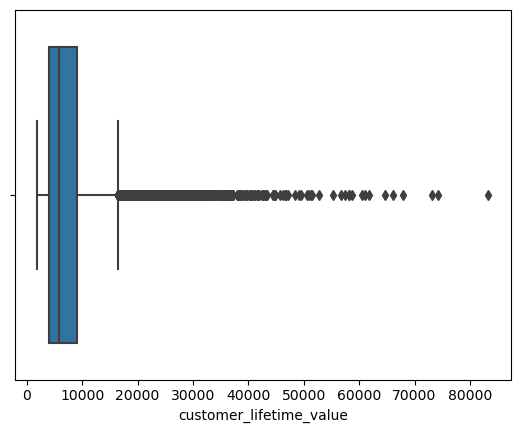

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


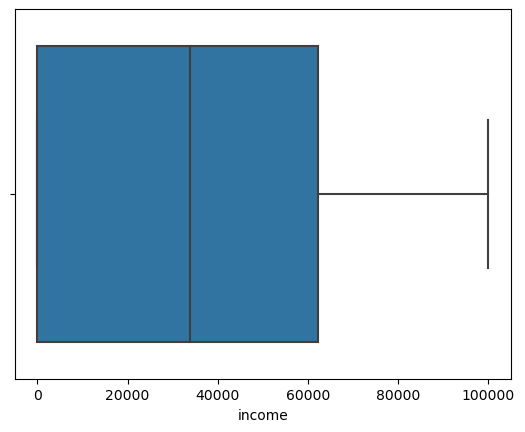

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


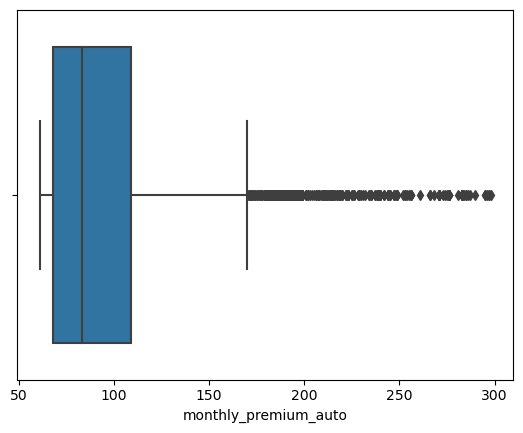

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


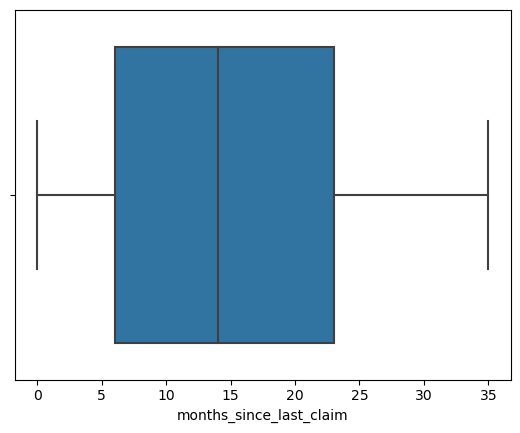

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


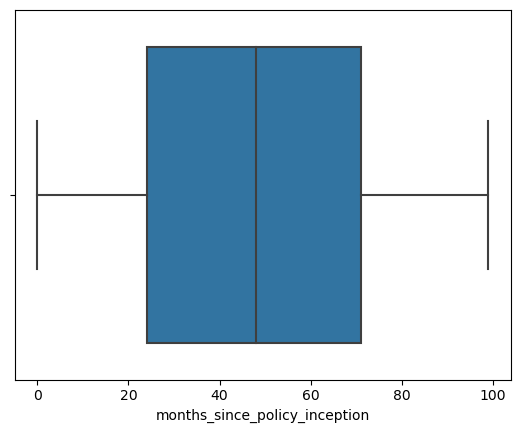

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


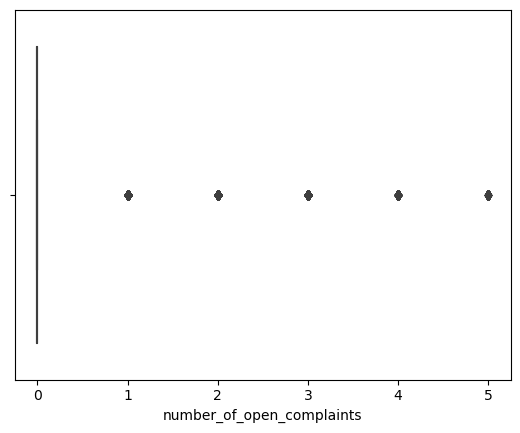

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


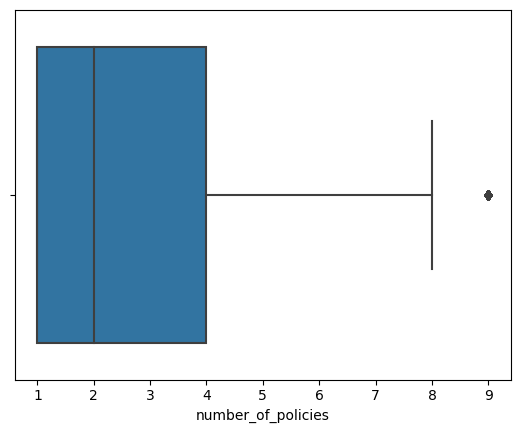

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


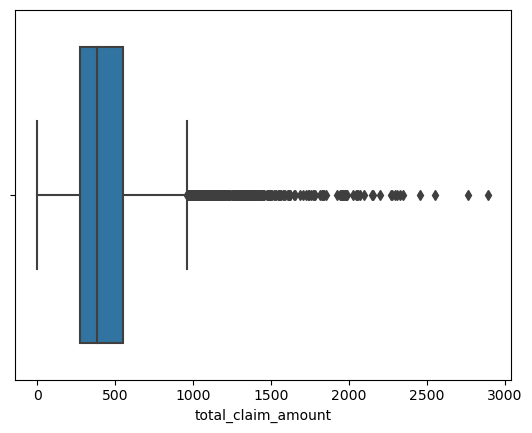

In [18]:
for i in numerical_df:
    sns.boxplot(numerical_df[i])
    plt.show()

# Lab | Comparing regression models

In [19]:
#2.Decided to find the outliers before the x-y split and then normalizing
data_all = pd.concat([numerical_df, categorical_df], axis=1)
data1 = data_all.copy()
data1 = data_all[data_all['total_claim_amount'] < 2200]
data1 = data_all[data_all['customer_lifetime_value'] < 54000]
data1 = data_all[data_all['monthly_premium_auto'] < 210]
data1.shape

(8989, 22)

In [20]:
#1. Performing the x-y split
y = data1['total_claim_amount']
X = data1.drop(['total_claim_amount'], axis=1)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(7191, 21)

(1798, 21)

(7191,)

(1798,)

In [22]:
customer_df = data1.copy()
customer_df.head()

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  \
0                          0                   1          384.811147   
1                          0                   8         1131.464935   
2                          0                   2          566.472247   
3                          0                   7          529.881344   
4                          0                   1          138.130879   

        state  response  ... effective_to_date employment_status gender  \
0  Washington         0  ...        24/02/2011          Employed      F   
1     Arizona         0  ...        31/01/2011        Unemployed      F   
2      Nevada         0  ...        19/02/2011          Employed      F   
3  California         0  ...        20/01/2011        Unemployed      M   
4  Washington         0  ...        02/03/2011          Employed      M   

  location_code marital_status     policy_type renew_offer_type sales_channel  \
0      Suburban        Married  Corporate Auto           Offer1         Agent   
1      Suburban         Single   Personal Auto           Offer3         Agent   
2      Suburban        Married   Personal Auto           Offer1         Agent   
3      Suburban        Married  Corporate Auto           Offer1   Call Center   
4         Rural         Single   Personal Auto           Offer1         Agent   

   vehicle_class vehicle_size  
0   Two-Door Car      Medsize  
1  Four-Door Car      Medsize  
2   Two-Door Car      Medsize  
3            SUV      Medsize  
4  Four-Door Car      Medsize  

[5 rows x 22 columns]

In [23]:
# data1['income']=data1['income'].replace(0,data1['income'].mean())
# data1['income'].value_counts()

In [24]:
X_cat_train = X_train.select_dtypes(['object'])
X_cat_test = X_test.select_dtypes(['object'])

X_num_train = X_train.select_dtypes(np.number)
X_num_test = X_test.select_dtypes(np.number)
X_num_train.head()
display(X_num_train.shape)
X_num_test.shape
display(X_cat_train.shape)
X_cat_test.shape

(7191, 8)

(7191, 13)

(1798, 13)

In [25]:
#3.Normalize the continuous variables. You can use any one method you want.
from sklearn.preprocessing import StandardScaler

# Scaling data
transformer = StandardScaler().fit(X_num_train) # need to keep transformer, fitting the data
X_train_num_standardized = transformer.transform(X_num_train)
X_train_num_standardized = pd.DataFrame(X_train_num_standardized,columns=X_num_train.columns)
#X_test_num_standardized = pd.DataFrame(X_train_num_standardized, columns = X_num_train.columns) #started as X test but used Xtrain that's why it was too big

In [26]:
X_test_num_standardized = transformer.transform(X_num_test)
X_test_norm = pd.DataFrame(X_test_num_standardized, columns = X_num_test.columns)

In [27]:
#4. Encode the categorical variables
# One hot encoding for the following variables: 'state','marital_status','policy_type','renew_offer_type','sales_channel','vehicle_class'
X_cat_train.head()

onehot_train = X_cat_train.drop(['coverage','employment_status','location_code','vehicle_size'],axis = 1)
onehot_test = X_cat_test.drop(['coverage','employment_status','location_code','vehicle_size'],axis = 1)
onehot_train.head()

state education effective_to_date gender marital_status  \
6880      Oregon  Bachelor        02/03/2011      F        Married   
5430  California   College        02/01/2011      F         Single   
2772      Nevada   College        24/01/2011      F        Married   
3526  California  Bachelor        26/02/2011      M        Married   
2210     Arizona   College        01/08/2011      F         Single   

         policy_type renew_offer_type sales_channel  vehicle_class  
6880   Personal Auto           Offer3         Agent     Sports Car  
5430  Corporate Auto           Offer1        Branch  Four-Door Car  
2772   Personal Auto           Offer1   Call Center   Two-Door Car  
3526   Personal Auto           Offer3         Agent  Four-Door Car  
2210   Personal Auto           Offer3         Agent   Two-Door Car

In [28]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown ='error', drop='first').fit(onehot_train)
X_train_cat_encoded  = encoder.transform(onehot_train).toarray()
X_test_cat_encoded = encoder.transform(onehot_test).toarray()

In [29]:
ordinal_train = X_cat_train.drop(['state','education','effective_to_date','gender','marital_status','policy_type','renew_offer_type','sales_channel','vehicle_class'],axis = 1)
ordinal_test = X_cat_test.drop(['state','education','effective_to_date','gender','marital_status','policy_type','renew_offer_type','sales_channel','vehicle_class'],axis = 1)
ordinal_train.head()
ordinal_test.head()


coverage employment_status location_code vehicle_size
3317     Basic          Employed         Urban        Large
6156     Basic        Unemployed      Suburban      Medsize
4961     Basic          Employed      Suburban      Medsize
6350  Extended          Employed         Urban      Medsize
8162  Extended          Employed      Suburban      Medsize

In [30]:
ordinal_train['coverage'].value_counts()

Basic       4467
Extended    2098
Premium      626
Name: coverage, dtype: int64

In [31]:
ordinal_train['employment_status'].value_counts()

Employed         4457
Unemployed       1858
Medical Leave     339
Disabled          320
Retired           217
Name: employment_status, dtype: int64

In [32]:
ordinal_train['location_code'].value_counts()

Suburban    4516
Rural       1414
Urban       1261
Name: location_code, dtype: int64

In [33]:
ordinal_train['vehicle_size'].value_counts()

Medsize    5074
Small      1352
Large       765
Name: vehicle_size, dtype: int64

In [34]:
def coverage(x):
    if 'Basic' in x:
        return "0"
    elif 'Extended' in x:
        return "1"
    else:
        return '2'
    
ordinal_train['coverage'] = ordinal_train['coverage'].apply(coverage)
ordinal_test['coverage'] = ordinal_test['coverage'].apply(coverage)

In [35]:
def employment_status(x):
    if 'Employed' in x:
        return "0"
    elif 'Unemployed' in x:
        return "1"
    elif 'Medical Leave' in x:
        return "2"
    elif 'Disabled' in x:
        return "3"
    else:
        return '4'
    
ordinal_train['employment_status'] = ordinal_train['employment_status'].apply(employment_status)
ordinal_test['employment_status'] = ordinal_test['employment_status'].apply(employment_status)

In [36]:
def location_code(x):
    if 'Suburban' in x:
        return "0"
    elif 'Rural' in x:
        return "1"
    else:
        return '2'
    
ordinal_train['location_code'] = ordinal_train['location_code'].apply(location_code)
ordinal_test['location_code'] = ordinal_test['location_code'].apply(location_code)

In [37]:
def vehicle_size(x):
    if 'Medsize' in x:
        return "0"
    elif 'Small' in x:
        return "1"
    else:
        return '2'
    
ordinal_train['vehicle_size'] = ordinal_train['vehicle_size'].apply(vehicle_size)
ordinal_test['vehicle_size'] = ordinal_test['vehicle_size'].apply(vehicle_size)

In [38]:
ordinal_train.head()

coverage employment_status location_code vehicle_size
6880        0                 0             1            0
5430        1                 4             0            1
2772        1                 0             2            0
3526        0                 0             0            0
2210        0                 1             0            1

In [45]:
X_train_processed = np.concatenate((ordinal_train, X_train_cat_encoded,X_train_num_standardized), axis=1)
X_test_processed = np.concatenate((ordinal_test, X_test_cat_encoded,X_test_norm), axis=1)

In [51]:
pd.DataFrame(X_train_processed)
#X_test_processed

0  1  2  3    4    5    6    7    8    9   ...   83   84        85  \
0     0  0  1  0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  0.0  0.033646   
1     1  4  0  1  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  2.652521   
2     1  0  2  0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  1.0 -0.086565   
3     0  0  0  0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0 -0.808287   
4     0  1  0  1  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0 -0.898745   
...  .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
7186  0  1  1  0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0 -0.805098   
7187  1  1  2  0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0 -0.630123   
7188  0  1  0  1  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0 -0.469252   
7189  0  2  2  0  0.0  0.0  0.0  1.0  1.0  0.0  ...  0.0  0.0 -0.384767   
7190  0  0  0  0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0 -0.474941   

            86        87        88        89        90        91        92  
0     1.088732   0.31448 -0.120181 -1.439615 -0.420889  1.684636 -0.402135  
1    -0.779326   0.21064 -1.407548  0.639486 -0.420889 -0.404815  2.486728  
2     0.716186   0.00296  0.771074  -0.97361 -0.420889  0.013075 -0.402135  
3     1.284239 -1.000826 -0.318237 -0.758531 -0.420889 -0.822705 -0.402135  
4    -1.225943  -0.72392  0.176904 -1.009457  5.090055 -0.822705 -0.402135  
...        ...       ...       ...       ...       ...       ...       ...  
7186 -1.225943  -0.72392  0.275932 -0.041599 -0.420889 -0.822705 -0.402135  
7187 -1.225943  0.245254  0.771074 -1.475462 -0.420889 -0.822705 -0.402135  
7188 -1.225943  -0.72392  -0.71435  0.926258 -0.420889  0.013075 -0.402135  
7189 -0.493599  -0.72392 -1.506576  0.496099    0.6813  0.430966 -0.402135  
7190 -0.413873  -1.03544  0.473989 -1.116996  1.783489  0.430966 -0.402135  

[7191 rows x 93 columns]

In [47]:
#5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
import datetime
X_train['day_of_week'] = pd.DatetimeIndex(X_train['effective_to_date']).day_of_week
X_train.head()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '24/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '26/02/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '17/02/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '13/02/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

customer_lifetime_value  income  monthly_premium_auto  \
6880              8086.011196   70811                   100   
5430             25464.820590   13663                    97   
2772              7288.297591   59414                    91   
3526              2498.963061   76792                    62   
2210              1898.683686       0                    70   

      months_since_last_claim  months_since_policy_inception  \
6880                       14                              8   
5430                        1                             66   
2772                       23                             21   
3526                       12                             27   
2210                       17                             20   

      number_of_open_complaints  number_of_policies       state  response  \
6880                          0                   7      Oregon         0   
5430                          0                   2  California         1   
2772                          0                   3      Nevada         0   
3526                          0                   1  California         0   
2210                          5                   1     Arizona         0   

      coverage  ... employment_status gender location_code marital_status  \
6880     Basic  ...          Employed      F         Rural        Married   
5430  Extended  ...           Retired      F      Suburban         Single   
2772  Extended  ...          Employed      F         Urban        Married   
3526     Basic  ...          Employed      M      Suburban        Married   
2210     Basic  ...        Unemployed      F      Suburban         Single   

         policy_type renew_offer_type sales_channel  vehicle_class  \
6880   Personal Auto           Offer3         Agent     Sports Car   
5430  Corporate Auto           Offer1        Branch  Four-Door Car   
2772   Personal Auto           Offer1   Call Center   Two-Door Car   
3526   Personal Auto           Offer3         Agent  Four-Door Car   
2210   Personal Auto           Offer3         Agent   Two-Door Car   

     vehicle_size day_of_week  
6880      Medsize           3  
5430        Small           1  
2772      Medsize           0  
3526      Medsize           5  
2210        Small           5  

[5 rows x 22 columns]

In [48]:
date_test = X_test[['effective_to_date']]
date_test['day_of_week'] = pd.DatetimeIndex(X_test['effective_to_date']).day_of_week
date_test = date_test.drop(['effective_to_date'], axis = 1)
date_test

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '18/02/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '22/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '30/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '29/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

day_of_week
3317            4
6156            0
4961            5
6350            5
8162            6
...           ...
689             6
2603            3
4425            1
8746            2
6561            5

[1798 rows x 1 columns]

In [52]:
date_train = X_train[['effective_to_date']]
date_train['day_of_week'] = pd.DatetimeIndex(X_train['effective_to_date']).day_of_week
date_train = date_train.drop(['effective_to_date'], axis = 1)
date_train

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '24/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '26/02/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '17/02/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '13/02/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

day_of_week
6880            3
5430            1
2772            0
3526            5
2210            5
...           ...
674             5
7661            5
7337            2
1343            5
9060            0

[7191 rows x 1 columns]

In [ ]:
#7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [61]:
#Creating a final version of X_test and X_train
X_train_processed2 = np.concatenate((ordinal_train, X_train_cat_encoded,X_train_num_standardized,date_train), axis=1)
X_test_processed2 = np.concatenate((ordinal_test, X_test_cat_encoded,X_test_norm,date_test), axis=1)

In [62]:
#8. Try a simple linear regression with all the data to see whether we are getting good results.
from sklearn import linear_model
from sklearn.metrics import r2_score

In [64]:
lm = linear_model.LinearRegression()
lm.fit(X_train_processed,y_train)

LinearRegression()

In [65]:
predictions_train = lm.predict(X_train_processed)
r2_score(y_train, predictions_train)

0.5866853195790324

In [66]:
predictions_test = lm.predict(X_test_processed)
r2_score(y_test, predictions_test)

0.5317177233586186

In [67]:
y_test[:5]

3317    299.788806
6156    350.400000
4961    312.000000
6350    402.741680
8162    600.000000
Name: total_claim_amount, dtype: float64

In [68]:
predictions_test[:5]

array([181.73973285, 443.90887292, 404.46814118, 123.67973861,
       525.51388549])

In [69]:
#now reconsidering the model with the additional changed date column
lm = linear_model.LinearRegression()
lm.fit(X_train_processed2,y_train)

LinearRegression()

In [70]:
predictions_train = lm.predict(X_train_processed2)
r2_score(y_train, predictions_train)

0.5866861425166174

In [71]:
predictions_test = lm.predict(X_test_processed2)
r2_score(y_test, predictions_test)

0.5316980285537714

In [ ]:
#Analysis: Not the best model, as the test date is higher than the train data, therefore would perhaps reconsider removing more columns or cleaning additional data

In [ ]:
#9. Define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code

In [74]:
def prediction_models(model):
    
    if model == linear_model.LinearRegression():
        model.fit(X_train_processed,y_train)
        predictions = model.predict(X_train_processed)
    return(score, r2_score)

In [ ]:
#10. Use the function to check LinearRegressor and KNeighborsRegressor.

In [75]:
# KNNeighborRegressor
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=6)
KNN.fit(X_train_processed, y_train)

KNeighborsRegressor(n_neighbors=6)

In [76]:
score = KNN.score(X_test_processed, y_test)
score

0.5854187323487603

In [77]:
score = KNN.score(X_train_processed, y_train)
score

0.7428488166545186

In [ ]:
#11. You can check also the MLPRegressor for this task!

In [78]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=200).fit(X_train_processed, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [79]:
regr.predict(X_test_processed[:3])

array([195.81983828, 402.42583731, 376.4245065 ])

In [80]:
regr.score(X_test_processed, y_test)

0.6995811560318351

In [81]:
#12. Discuss the results
#We're getting an exponentially higher score with the KNN model compared to the Linear Regression model. In addition the former has a big difference in score between the test and model data, since the train test is closer to 1, perhaps we would consider it as a good model compared to Linear Regression.

# Lab | Random variable distributions

In [ ]:
#1. Get the numerical variables from our dataset.

In [83]:
numerical_df.head()

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   1          384.811147  
1                          0                   8         1131.464935  
2                          0                   2          566.472247  
3                          0                   7          529.881344  
4                          0                   1          138.130879

In [ ]:
#2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

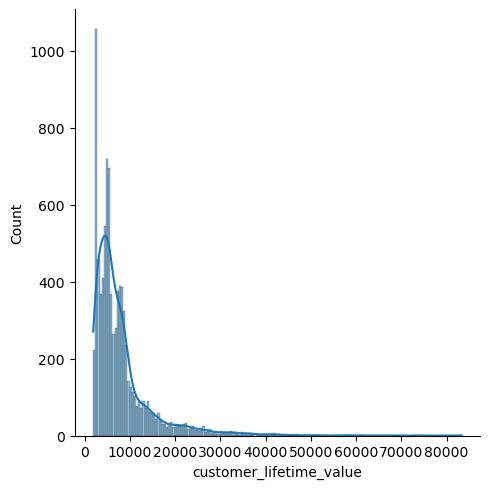

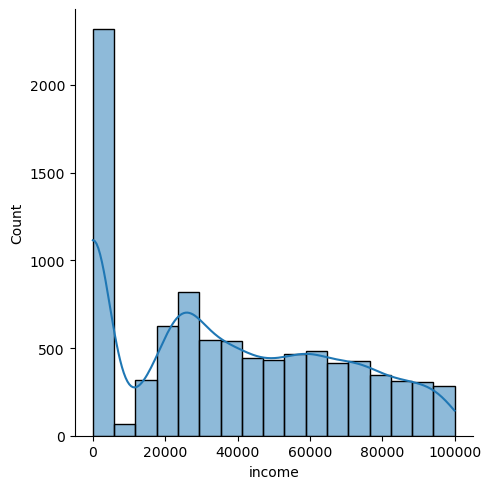

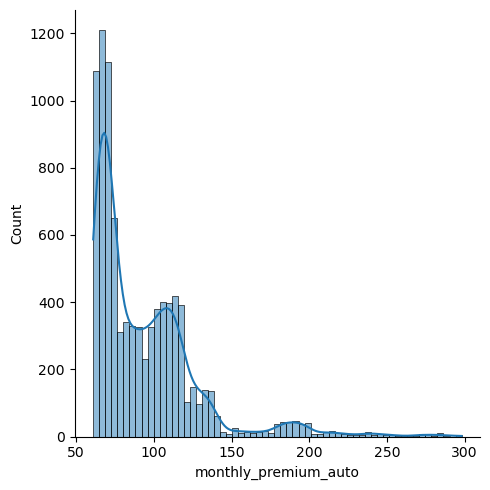

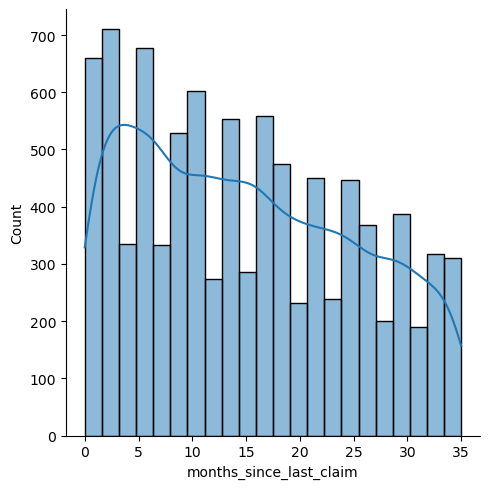

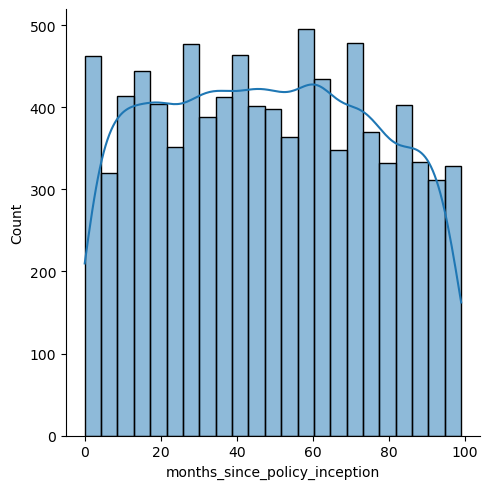

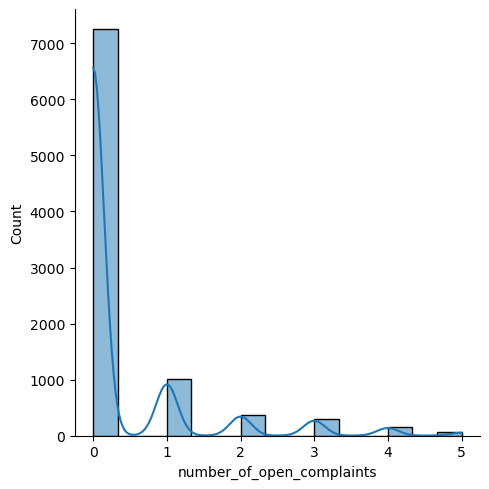

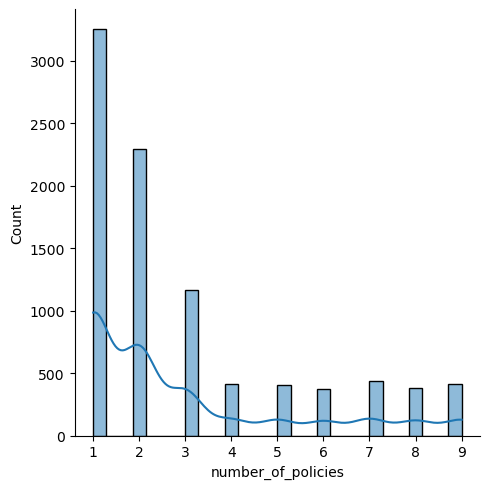

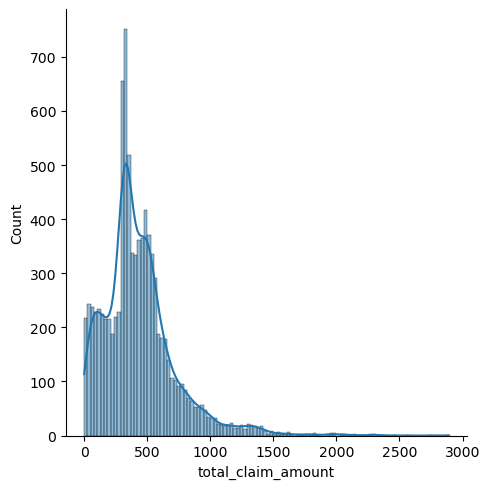

In [84]:
for i in numerical_df:
    sns.displot(numerical_df[i], kde=True)
    plt.show()

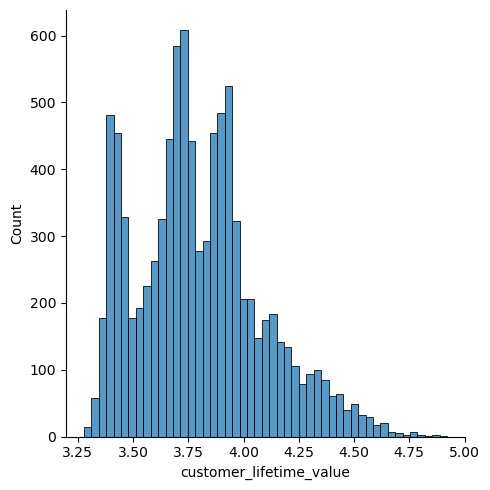

In [95]:
def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0
    
customer_lifetime_value_log = numerical_df['customer_lifetime_value'].apply(log_transfom_clean1)
sns.displot(customer_lifetime_value_log)
plt.show()


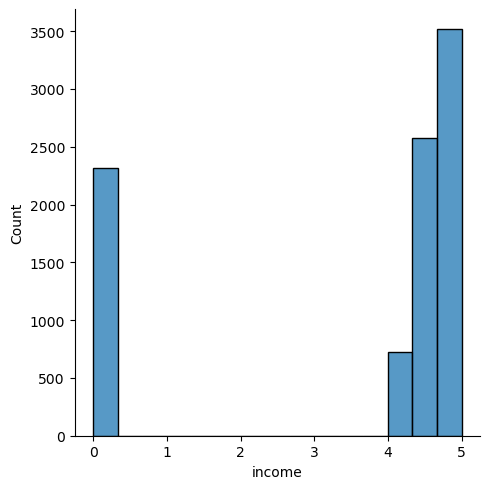

In [96]:
income_log = numerical_df['income'].apply(log_transfom_clean1)
sns.displot(income_log)
plt.show()

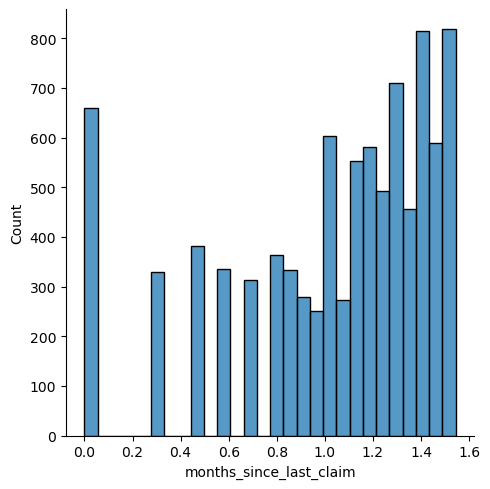

In [97]:
months_since_last_claim_log = numerical_df['months_since_last_claim'].apply(log_transfom_clean1)
sns.displot(months_since_last_claim_log)
plt.show()

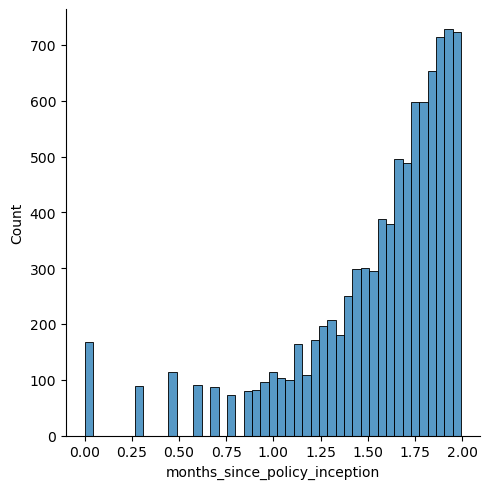

In [98]:
months_since_policy_inception_log = numerical_df['months_since_policy_inception'].apply(log_transfom_clean1)
sns.displot(months_since_policy_inception_log)
plt.show()

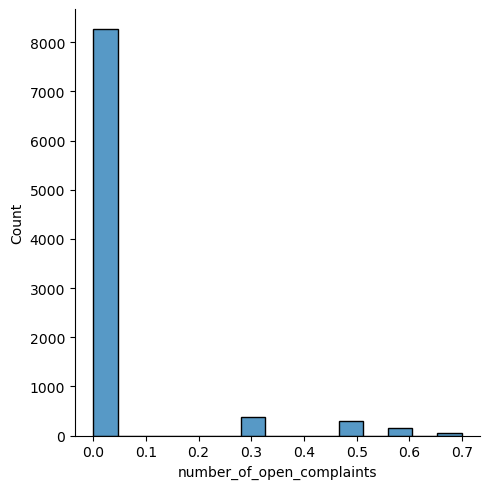

In [99]:
number_of_open_complaints_log = numerical_df['number_of_open_complaints'].apply(log_transfom_clean1)
sns.displot(number_of_open_complaints_log)
plt.show()